#SETUP

## **Installation**
First we need to install the package. Feel free to copy the terminal command for local installation.

In [ ]:
!pip3 install scrambledConvolution@git+https://github.com/tillvogt/scrambledConvolution.git

  Cloning https://github.com/tillvogt/scrambledConvolution.git to /tmp/pip-install-f12heqg3/scrambledconvolution_6e700873629e455fb72fbe2636ea0730
  Running command git clone --filter=blob:none --quiet https://github.com/tillvogt/scrambledConvolution.git /tmp/pip-install-f12heqg3/scrambledconvolution_6e700873629e455fb72fbe2636ea0730
  Resolved https://github.com/tillvogt/scrambledConvolution.git to commit bbdcf9b38f461ee859bdcff665592ffd39205a6d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 18.2 MB/s eta 0:00:00
  Created wheel for scrambledConvolution: filename=scrambledconvolution-0.0.1-py3-none-any.whl size=303657 sha256=958f90340fb81d4c16b8700e3bd3e1c5c702a0dd6903d612b83188c5bd8664ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-czbwlxc4/wheels/cf/64/96/56

##**Imports**
next to the scrambledConvolution package, numpy and numba are installed as dependencies.
For visualizing things we import matplotlib.pyplot.

The scrambledConvolution Package can be divided in different Subpackages:


*   .layers: the different processinglayers like *'Convolutional'*, *'Dense'*, *'Pooling'* and *'Reshape'*.
*   .activations: the different activation Layers like *'Softmax'*, *'Sigmoid'*, *'Tanh'*
*   .losses: Lossfunctions like *'RMS'* and *'binary_cross_entropy'*
*   .datasets: small sample packages like a shrinked version of MNIST





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scrambledConv.layers import Convolutional
from scrambledConv.datasets.mnist_loader import load_data

Sie nutzen das sehr gute Package von Till Vogt


#CONVOLUTIONAL LAYER

##**Loading testdata**

Due to the fact, that this whole project is mainly about the Convolutional Layer, we try out some of the corresponding features.

So lets import some handwritten digits from MNIST Dataset. We use the build in Dataloader for that.

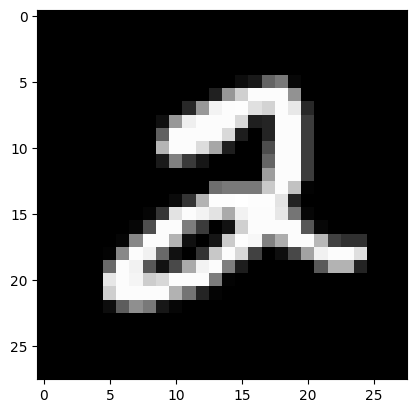

In [ ]:
x_train, y_train, x_test, y_test = load_data()

#change the picture_index for choosing another example
picture_index = 5
test_image = x_train[picture_index]

plt.imshow(test_image[0], cmap="gray")

##**Using 'Convolution'**

Now we instantiate a Convolutional layer. For feeding it with our testdata, just give it as argument, for the *.forward* method.

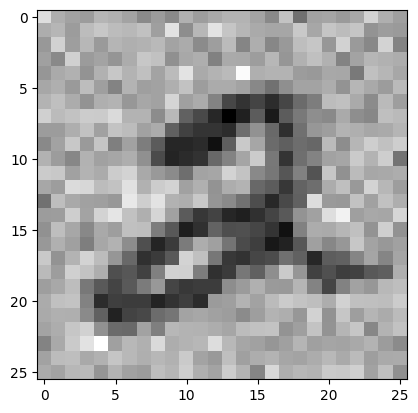

In [ ]:
conv1 = Convolutional((1,28,28), 3, 1, type="regular", mix_factor = 0)
conv_image = conv1.forward(test_image)

plt.imshow(conv_image[0], cmap="gray")

As you might see, the image is reduced in size, as well as noisy. The noise comes from the randomly picked biases, when initialising the Layer. So for investigate the kernel variations, we should set them to zero:

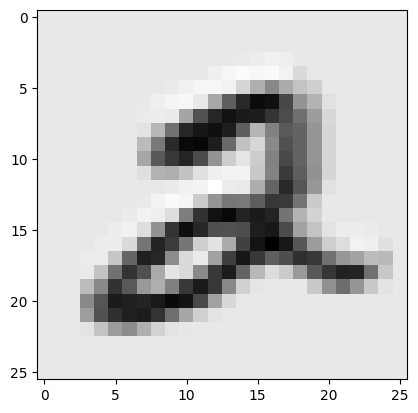

In [ ]:
conv1.biases = np.zeros(conv1.biases.shape)
conv_image = conv1.forward(test_image)

plt.imshow(conv_image[0], cmap="gray")

##Mix IT UP!##

Now after removing noise, let's test the mixing capabilities.
Here you can pick one of the different types:
*   "*regular*" = standard cross-correlation
*   "*retinaMix*" = the kernel stays in square shape, directs the result of operations to random positions in the resulting image
*   "kernelMix" = in this mode, the kernel is variated. For some of the Operations pixel inside the kernel is redirected to a random position.


All the mixing operations depend on the *mix_factor*, wich is a frequency depending on the imagesize.

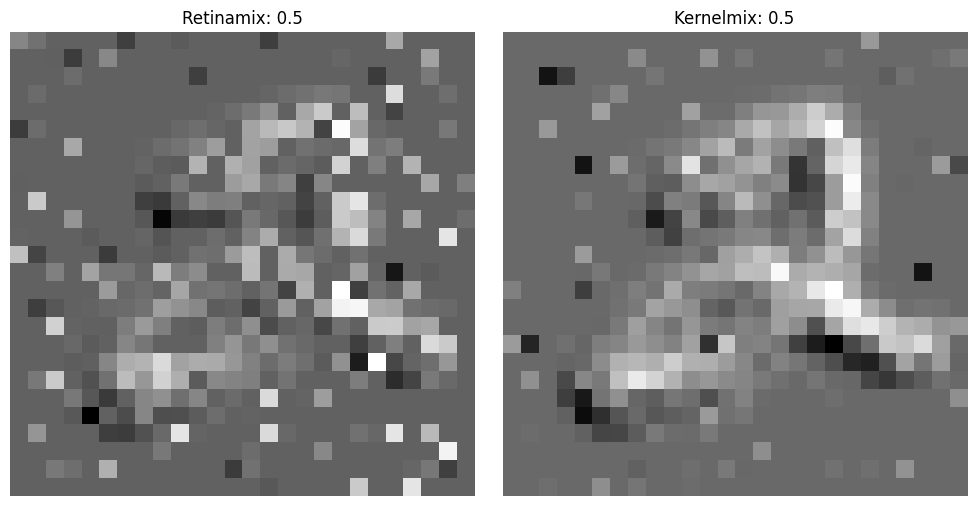

In [ ]:
#Instantiate two Concolutional layers
conv_retina_mix = Convolutional((1,28,28), 3, 1, type="retinaMix", mix_factor=0.5)
conv_kernel_mix = Convolutional((1,28,28), 3, 1, type="kernelMix", mix_factor=0.5)

#Setting same weights for better comparison
conv_retina_mix.kernels = conv_kernel_mix.kernels

#Setting biases to zero
conv_retina_mix.biases = np.zeros(conv_retina_mix.biases.shape)
conv_kernel_mix.biases = np.zeros(conv_kernel_mix.biases.shape)

#feeding it with the testimage
retina_mix_image = conv_retina_mix.forward(test_image)
kernel_mix_image = conv_kernel_mix.forward(test_image)


######plotting#####
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(retina_mix_image[0], cmap="gray")
axs[0].title.set_text("Retinamix: 0.5")
axs[0].axis("off")

axs[1].imshow(kernel_mix_image[0], cmap="gray")
axs[1].title.set_text("Kernelmix: 0.5")
axs[1].axis("off")

plt.tight_layout()
plt.show()

#TRAIN

##Essential imports

For training a Network, one has to make some further imports first.

In [ ]:
from scrambledConv import train
from scrambledConv.losses import mse
from scrambledConv.activations import Sigmoid, Softmax
from scrambledConv.layers import *
#from scrambledConv.datasets import to_categorical

##Building Network

Now we are able to build a Network as a list of the different layer Classes.

In [ ]:
network = [
      Convolutional((1, 28, 28), 5, 5),
      Sigmoid(),
      Pooling(),
      Convolutional((5, 12, 12), 5, 5),
      Sigmoid(),
      Pooling(),
      Reshape((5,4,4), ((5*4*4), 1)),
      Dense(80, 32),
      Sigmoid(),
      Dense(32,10),
      Softmax()
]